In [12]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [14]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


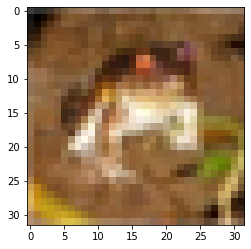

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [16]:
print('The label is:', y_train[0])

The label is: [6]


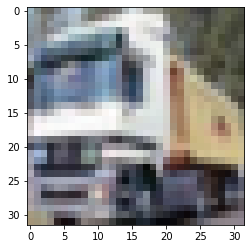

In [17]:
img = plt.imshow(x_train[1])

In [18]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [19]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

W0801 22:57:00.679756 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

W0801 22:57:32.274621 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 22:57:32.825537 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [24]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0801 22:58:02.406493 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [26]:
model.add(Dropout(0.25))

W0801 22:58:13.881430 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 22:58:13.945343 140225924937536 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(512, activation='relu'))

In [30]:
model.add(Dropout(0.5))

In [31]:
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0801 22:59:53.562695 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 22:59:53.662702 140225924937536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [36]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=100, epochs=5, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 124s 3ms/step - loss: 1.3860 - acc: 0.4996 - val_loss: 1.1834 - val_acc: 0.5841
Epoch 2/5
40000/40000 [==============================] - 123s 3ms/step - loss: 1.1160 - acc: 0.6044 - val_loss: 0.9559 - val_acc: 0.6626
Epoch 3/5
40000/40000 [==============================] - 120s 3ms/step - loss: 0.9716 - acc: 0.6547 - val_loss: 0.8504 - val_acc: 0.7014
Epoch 4/5
40000/40000 [==============================] - 120s 3ms/step - loss: 0.8713 - acc: 0.6925 - val_loss: 0.8245 - val_acc: 0.7104
Epoch 5/5
40000/40000 [==============================] - 120s 3ms/step - loss: 0.7958 - acc: 0.7214 - val_loss: 0.7332 - val_acc: 0.7397


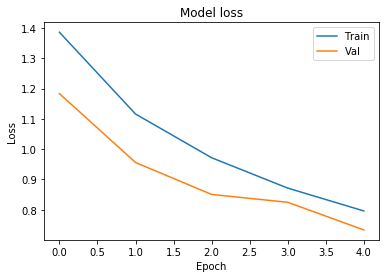

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

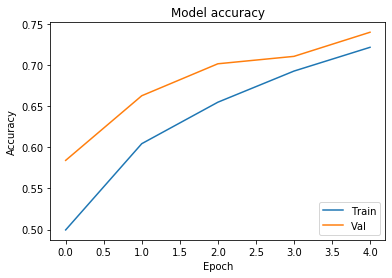

In [38]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [41]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 6s 638us/step


0.7418